## Algorytm wstecznej propagacji: 
### Jest to coś dzięki czemu możemy wykorzystać metodę *spadku gradientu* w przypadku wielopoziomowych  sieci neuronowych &#128526;
*(W tej notatce będę użwyać skrótowego myślenia, weźmy więc hipotetyczną sieć neuronową o 3 warstwach, oraz ilości neuronów w warstwach: 3->2->1)*

### Algorytm backpropagation ma niejako dwie fazy:
* #### forward:
    * Przepuszczmy przykład uczący przez całą sieć, zapisując wartości In oraz Out dla poszczególnych neuronów. 
    Przykładowo:

$$
in_{21} = w_{21}out_{11} + w_{22}out_{12} + w_{23}out_{13} + b_{21}
$$

$$
out_{21} = \varphi(in_{21}) = \tanh(in_{21})
$$




* #### backward
    * W tej fazie aktualizujemy wagi, wymaga więc to od nas znalezienia pochodnych cząstkowych dla wszstkich wag oraz wyrazów wolnych neuronów w sieci.           
    Przykład obliczeń pochodnej czastkowej wagi 1 neuronu 3 warstwy:
    $$ \frac{\delta E}{\delta w_{31}} = \frac{\delta E}{\delta out_{31}} \frac{\delta out_{31}}{\delta w_{31}} = \frac{\delta E}{\delta out_{31}} \frac{\delta out_{31}}{\delta in_{31}} \frac{\delta in_{31}}{\delta w_{31}} $$

### Obliczenia pochodnych warsty wyjśiowej sieci:
A więc, zaczynając od wyjścia sieci neuronowej, Liczymy pochodną funkcji straty po wyjściu sieci, później pochodną wyjścia sieci względem wyjścia ostatniego neuronu, następnie pochodną wyjścia ostatniego neuronu względem jego wejścia (w tym wypadku 3 1). 

### *Konkluzja jest taka, że liczymy pochodne cząstkowe dla wszstkich in, out, w, b od wyjścia sieci aż do jej począstku*

Warto również zauważyć, że pochodna pierwszego iloczynu w naszych obliczeniach jest równa wyjściu poprzedniego neurona zkorelowanego z daną wagą ( w naszym wypadku w31 pierwszy iloczyn łańcucha pochodnych = out21):
$$ \frac{\delta in_{31}}{\delta w_{31}} = \frac{\delta}{\delta w_{31}} (w_{31} out_{21} + w_{32} out_{22} + b_{31}) = out_{21} $$

Pochodna drugiego iloczynu też została przez nas niebezpośrednio zapisana w fazie backward:
$$ \frac{\delta out_{31}}{\delta in_{31}} = \frac{\delta}{\delta in_{31}} \varphi (in_{31}) $$
$$ \frac{\delta out_{31}}{\delta in_{31}} = \frac{\delta}{\delta in_{31}} \varphi (in_{31}) = 1 - tanh^{2}(in_{31}) $$
    
W takim razie zostaje skrajnie lewy iloczyn, któru możemy obliczyć z: 
$$ \frac{\delta E}{\delta out_{31}} = \frac{\delta}{\delta out_{31}} (y - f(x))^{2} = \frac{\delta}{\delta out_{31}} (y - out_{31})^{2} = \\ 
= 2 \cdot (y - out_{31}) \frac{\delta}{\delta out_{31}} (y - out_{31}) = 2 \cdot (y - out_{31}) \cdot (-1) = 2 \cdot (out_{31} - y) $$



### Obliczenia pochodnych warstw ukrytych sieci:
Jest to już niestety bardziej skomplikowane, lecz zów regóła łańcuchowa liczenia pochodnych nam pomoże. Korzystamy tuaj z:
$$ \frac{\delta E}{\delta w_{11}} = \frac{\delta E}{\delta out_{11}} \frac{\delta out_{11}}{\delta w_{11}} = \frac{\delta E}{\delta out_{11}} \frac{\delta out_{11}}{\delta in_{11}} \frac{\delta in_{11}}{\delta w_{11}} $$
Jak doskonale widać jesteśmy w stanie obliczyć dwa skrajnie prawe iloczyny korzystająć z zapisanych in oraz out sieci, jednakże nie jesteśmy w stanie obliczyć $$\frac{\delta E}{\delta out_{11}}$$
Możemy to obliczyć jako sumę wpływu na neurony których nasze out11 stanowi wejście, w takim wypadku koniecznym staje się obliczenie pochodnych cząstkowych po wszstkuch neuronach kolejne warstwy sieci i tak dalej aż do ostatniej warstwy i wyjścia całej sieci w naszym wypadku out31, a więc wychodzi nam coś takigo:
$$ \frac{\delta E}{\delta out_{11}} = \sum_{n \in N}{(\frac{\delta E}{\delta in_{n}} \frac{\delta in_{n}}{\delta out_{11}})} = \sum_{n \in N}{(\frac{\delta E}{\delta out_{n}} \frac{\delta out_{n}}{\delta in_{n}} \frac{\delta in_{n}}{\delta out_{11}})} = \\
= \frac{\delta E}{\delta out_{21}} \frac{\delta out_{21}}{\delta in_{21}} \frac{\delta in_{21}}{\delta out_{11}} + \frac{\delta E}{\delta out_{22}} \frac{\delta out_{22}}{\delta in_{22}} \frac{\delta in_{22}}{\delta out_{11}} $$ 

#### W takim razie już wiadomo skąd nazwa backpropagation&#128521;... Trzeba liczenie wag zacząć od końca i propagować wyniki na następne warstwy wstecz!  &#128513;

Implementacja algorytmu wstecznej propagacji:

faza foward:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
layer_size = (1, 3, 2, 1) # first entry is an input layer
activations = (np.tanh, np.tanh, lambda x: x)
# derivatives - pochodne zmiennej x funkcji aktywacji
derivatives = ((lambda x: 1 - (np.tanh(x) ** 2)),
               (lambda x: 1 - (np.tanh(x) ** 2)),
               (lambda x: 1))

In [5]:
x = 1.0
y = np.array([-4.0])

In [6]:
def n_in_out(x, weights):
    x_vector = np.array(x)
    current_input = np.append(x_vector, 1)
    n_ins, n_outs = [x_vector], [x_vector]
    for layer_weigths, activation_func in zip(weights, activations):
        dot_product = layer_weigths.dot(current_input)
        n_ins.append(dot_product)
        activated_vector = activation_func(dot_product)
        n_outs.append(activated_vector)
        current_input = np.append(activated_vector, 1)
    return n_ins, n_outs

In [7]:
n_ins, n_outs = n_in_out(x, weights)
n_ins, n_outs

([array(1.),
  array([1.38030917, 1.66977293, 0.33671277]),
  array([1.71646945, 0.86496614]),
  array([0.85712527])],
 [array(1.),
  array([0.88102048, 0.93152166, 0.32453954]),
  array([0.9374365 , 0.69880751]),
  array([0.85712527])])

teraz faza backward:

In [9]:
def calculate_grad(x, y, weights):
    n_ins, n_outs = n_in_out(x, weights)
    new_weights = weights.copy()
    
    # Output list
    grad = []
    
    # Output layer
    n_out = n_outs[-1]
    n_in = n_ins[-1]
    dE_dout = 2 * (n_out - y)
    dout_din = np.vectorize(derivatives[-1])(n_in)
    din_dw = np.append(n_outs[-2], 1)
    dE_dw = np.outer(dE_dout * dout_din, din_dw)
    grad.append(dE_dw)

    # Hidden layers
    for index, n_out in reversed(list(enumerate(n_outs[:-1]))):
        if index == 0:
            break
        n_in = n_ins[index]
        din_dout = weights[index][:, :-1] # next layer weights, without bias
        dE_dout = sum([dE_dout[n] * dout_din[n] * din_dout[n, :]
                       for n in range(dE_dout.shape[0])])
        dout_din = np.vectorize(derivatives[index - 1])(n_in)
        din_dw = np.append(n_outs[index - 1], 1) # put bias term
        dE_dw = np.outer(dE_dout * dout_din, din_dw)
        grad.append(dE_dw)
    return list(reversed(grad))

In [10]:
calculate_grad(x, y, weights)

[array([[0.05335664, 0.05335664],
        [0.01630179, 0.01630179],
        [0.1793172 , 0.1793172 ]]),
 array([[0.30828687, 0.32595826, 0.11356294, 0.34992021],
        [0.13860846, 0.14655367, 0.05105889, 0.15732717]]),
 array([[9.106493  , 6.78839127, 9.71425054]])]

powyżej zamplementowano cały algorytm, teraz czas na testy:

In [13]:
np.random.seed(12421)
w_init = np.random.random(size=17)
w_init

array([0.50582533, 0.87448384, 0.67835808, 0.99141485, 0.22261684,
       0.11409593, 0.53544872, 0.29510281, 0.16268881, 0.91703455,
       0.32444944, 0.12703629, 0.91210753, 0.16476752, 0.29717426,
       0.03165236, 0.55642436])

In [15]:
x_values = np.linspace(-2, 5, 25)

xy_df = pd.DataFrame({
    "x": x_values,
    "y": -2 * x_values ** 2 + 5 * x_values + 1
})

In [18]:
x = sym.Symbol("x")
w11, w12, w13, b11, b12, b13 = sym.symbols("w11 w12 w13 b11 b12 b13")
w21, w22, w23, w24, w25, w26, b21, b22 = sym.symbols("w21 w22 w23 w24 w25 w26 b21 b22")
w31, w32, b31 = sym.symbols("w31 w32 b31")

In [19]:
n11_in = w11 * x + b11
n11 = sym.tanh(n11_in)
n12_in = w12 * x + b12
n12 = sym.tanh(n12_in)
n13_in = w13 * x + b13
n13 = sym.tanh(n13_in)

n21_in = w21 * n11 + w22 * n12 + w23 * n13 + b21
n21 = sym.tanh(n21_in)
n22_in = w24 * n11 + w25 * n12 + w26 * n13 + b22
n22 = sym.tanh(n22_in)

n31_in = w31 * n21 + w32 * n22 + b31
n31 = n31_in
n31

b31 + w31*tanh(b21 + w21*tanh(b11 + w11*x) + w22*tanh(b12 + w12*x) + w23*tanh(b13 + w13*x)) + w32*tanh(b22 + w24*tanh(b11 + w11*x) + w25*tanh(b12 + w12*x) + w26*tanh(b13 + w13*x))

In [20]:
weights = [w11, w12, w13, b11, b12, b13,
           w21, w22, w23, w24, w25, w26, b21, b22,
           w31, w32, b31]
weights

[w11,
 w12,
 w13,
 b11,
 b12,
 b13,
 w21,
 w22,
 w23,
 w24,
 w25,
 w26,
 b21,
 b22,
 w31,
 w32,
 b31]

In [24]:
curr_f = n31.subs(dict(zip(weights, w_init)))
pred_y = np.array([curr_f.evalf(subs={x: x_val}) 
                   for x_val in xy_df["x"]])

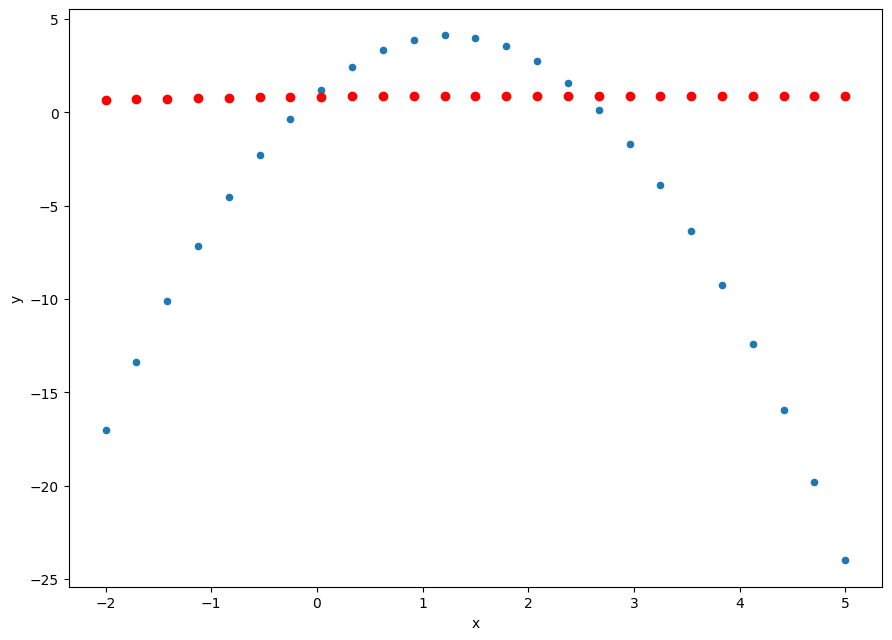

In [25]:
ax = xy_df.plot.scatter(x="x", y="y", figsize=(10.5, 7.5))
ax.scatter(x=xy_df["x"], y=pred_y, c="r")

In [26]:
def predict(x, weights):
    _, n_outs = n_in_out(x, weights)
    return n_outs[-1]

In [28]:
np.random.seed(12421)

weights = [
    np.random.random(size=(out_size, in_size + 1)) # +1 adds weight for bias
    for in_size, out_size in zip(layer_size[:-1], layer_size[1:])
]
weights

[array([[0.50582533, 0.87448384],
        [0.67835808, 0.99141485],
        [0.22261684, 0.11409593]]),
 array([[0.53544872, 0.29510281, 0.16268881, 0.91703455],
        [0.32444944, 0.12703629, 0.91210753, 0.16476752]]),
 array([[0.29717426, 0.03165236, 0.55642436]])]

In [29]:
predict(1.0, weights)

array([0.85712527])

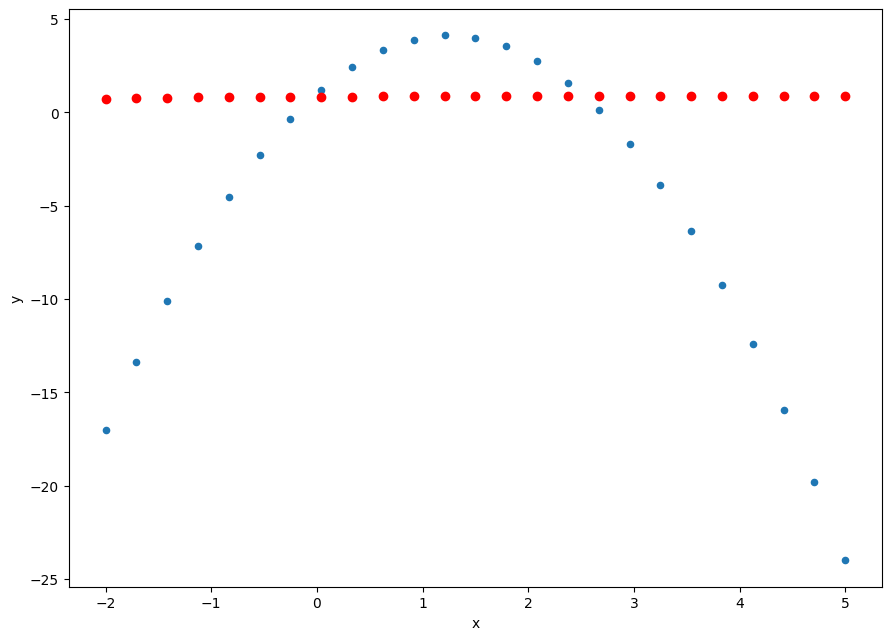

In [30]:
pred_y = np.array([predict(x_val, weights)[0]
                   for x_val in xy_df["x"]])
ax = xy_df.plot.scatter(x="x", y="y", figsize=(10.5, 7.5))
ax.scatter(x=xy_df["x"], y=pred_y, c="r")

In [31]:
max_iter = 10000
gamma = 0.0001

In [32]:
w_optimal = weights.copy()
for i in range(max_iter):
    grad = [np.zeros_like(w) for w in w_optimal]
    for x_val, y_true in zip(xy_df["x"], xy_df["y"]):
        current_grad = calculate_grad(x_val, y_true, w_optimal)
        grad = [g + cg for g, cg in zip(grad, current_grad)]
    
    for i, _ in enumerate(w_optimal):
        w_optimal[i] = w_optimal[i] - gamma * grad[i]

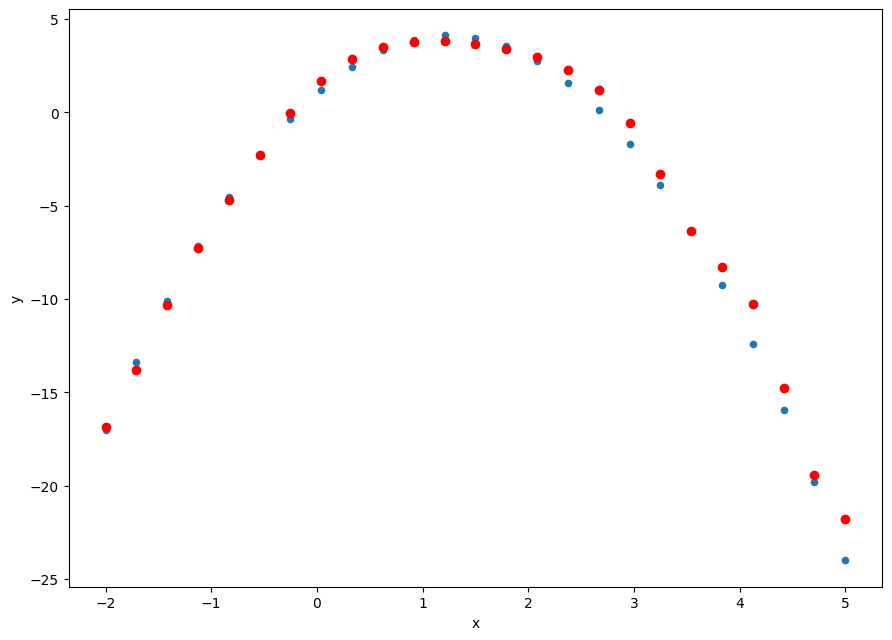

In [33]:
pred_y = np.array([predict(x_val, w_optimal)[0]
                   for x_val in xy_df["x"]])
ax = xy_df.plot.scatter(x="x", y="y", figsize=(10.5, 7.5))
ax.scatter(x=xy_df["x"], y=pred_y, c="r")

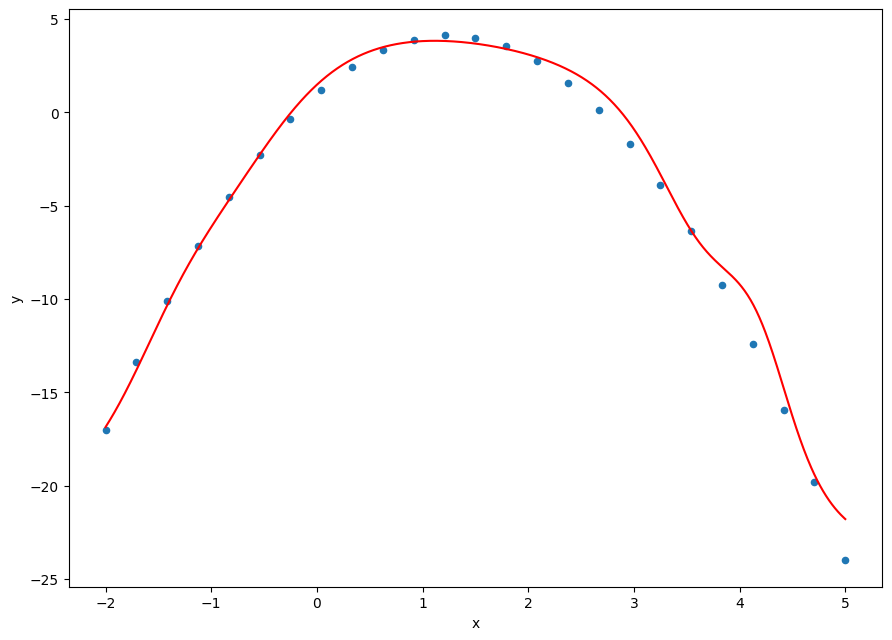

In [34]:
pred_x = np.linspace(xy_df["x"].min(),
                     xy_df["x"].max(),
                     1000)
pred_y = np.array([predict(x_val, w_optimal)[0]
                   for x_val in pred_x])
ax = xy_df.plot.scatter(x="x", y="y", figsize=(10.5, 7.5))
ax.plot(pred_x, pred_y, c="r")